<b>Probability</b>

In [2]:
import enum,random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl) # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


<b>CONTINUOUS DISTRIBUTION</b><BR>
<b>Probability Density Function</b>

In [3]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

<b>Cumulative Distribution Function</b>

In [4]:
def uniform_cdf(x:float) -> float:
    if x < 0 : return 0
    elif x < 1: return x
    else: return 1

<b>NORMAL DISTRIBUTION</b><br>
<b>Probability Density Function</b>

In [5]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

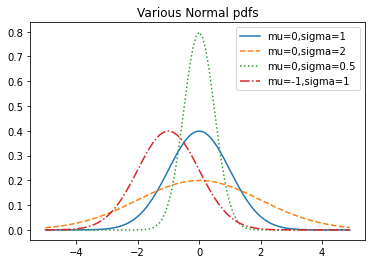

In [6]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

<b>Cumulative Distribution Function</b>

In [8]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

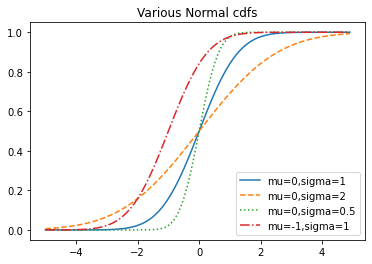

In [9]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [12]:
def inverse_normal_cdf(p: float,
                        mu: float = 0,
                        sigma: float = 1,
                        tolerance: float = 0.00001) -> float:

    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0 
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # Consider the midpoint
        mid_p = normal_cdf(mid_z) # and the CDF's value there
        if mid_p < p:
            low_z = mid_z # Midpoint too low, search above it
        else:
            hi_z = mid_z # Midpoint too high, search below it
    return mid_z

<b>Central Limit Theorm</b>

In [13]:
def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0
def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

In [14]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))
    xs = range(min(data),max(data) + 1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i-0.5,mu, sigma)
         for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()